In [8]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
# class creation

class Lasso_Regression():

  # hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the data
  def fit(self, X, Y):

    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # optimal  gradient descent 

    for i in range(self.no_of_iterations):
      self.upadte_weights()

  # update the weight/bias 
  def upadte_weights(self):
    
    Y_prediction = self.predict(self.X)  
    dw = np.zeros(self.n)

    for i in range(self.n):
      if self.w[i]>0:
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 
      else :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

    # bias gradient 
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    #  weights/bias
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

In [29]:
#upload data
salary_data = pd.read_csv('Downloads/salary_data.csv')

In [30]:
#create variables
X = salary_data.iloc[:,:-1].values      
Y = salary_data.iloc[:,1].values

In [31]:
# train/test dataset split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

In [36]:
#intialise hyperparameters
model = Lasso_Regression(learning_rate=0.02, no_of_iterations=1000, lambda_parameter=0)

In [37]:
model.fit(X_train, Y_train)

In [34]:
test_data_prediction = model.predict(X_test)

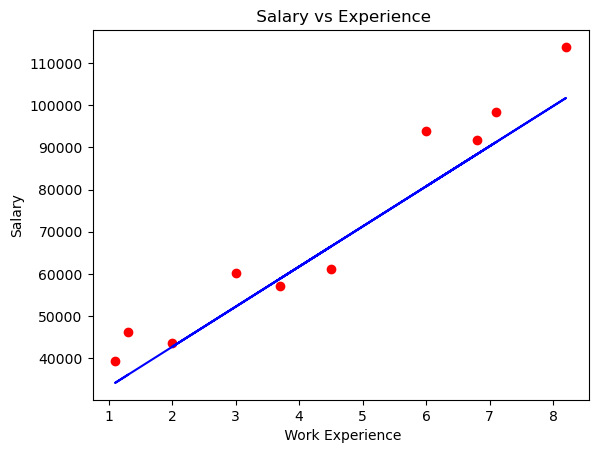

In [38]:
# show data and regression

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()